# Data Science Challenge

In [269]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [380]:
#Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, Imputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers 
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person 
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

## Data Wrangling & Visualization

In [271]:
# Dataset is already loaded below
df = pd.read_csv("train.csv",index_col=0)

In [272]:
# Explore the first five rows
df.head()

surface_area  agricultural_land   forest_area  armed_forces_total  \
0      120540.0       2.632839e+06  5.417843e+06           1379000.0   
1      752610.0       2.403039e+07  4.957554e+07             16500.0   
2        1396.0       3.000000e+03  8.000000e+01                 NaN   
3     2758812.0       1.228845e+08  1.050943e+08           1518650.0   
4         340.0       1.100000e+04  1.699000e+04                 NaN   

   urban_pop_major_cities  urban_pop_minor_cities national_income  \
0               55.747169                4.688831         unknown   
1               16.890687               23.136313        very low   
2               18.390090               23.139910         unknown   
3               50.966885               24.522427            high   
4                5.311885               30.271115         unknown   

   inflation_annual  inflation_monthly  inflation_weekly  \
0               NaN                NaN               NaN   
1               NaN           0.581473               NaN   
2               NaN                NaN               NaN   
3          1.374906                NaN               NaN   
4         -0.044229                NaN               NaN   

     mobile_subscriptions       internet_users  secure_internet_servers_total  \
0  less than 1 per person    0 per 1000 people                            NaN   
1  less than 1 per person  154 per 1000 people                   2.623624e+06   
2  more than 1 per person    90 per 100 people                   1.656589e+09   
3  more than 1 per person    76 per 100 people                   6.625072e+08   
4  more than 1 per person  350 per 1000 people                   2.832808e+07   

  improved_sanitation women_parliament_seats_rate  life_expectancy  
0         high access                    [0%-25%)        69.494195  
1          low access                    [0%-25%)        59.237366  
2             no info                     unknown        81.300000  
3    very high access                   [25%-50%)        81.373197  
4    very high access                   [25%-50%)        73.193561

In [273]:
# Find number of rows and columns
df.shape

(362, 16)

In [274]:
# Explore column types
df.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [275]:
#Description
df.describe()

surface_area  agricultural_land   forest_area  armed_forces_total  \
count  3.620000e+02       3.580000e+02  3.570000e+02        3.180000e+02   
mean   4.021884e+06       1.594881e+08  1.204151e+08        9.849864e+05   
std    1.234491e+07       4.964143e+08  3.796623e+08        2.994686e+06   
min    3.030000e+01       3.000000e+02  0.000000e+00        5.000000e+01   
25%    2.783000e+04       1.054198e+06  4.951445e+05        1.218000e+04   
50%    2.037745e+05       5.360256e+06  3.928535e+06        5.352500e+04   
75%    1.081610e+06       4.221935e+07  2.241297e+07        2.598000e+05   
max    1.343253e+08       5.067600e+09  4.132117e+09        2.720662e+07   

       urban_pop_major_cities  urban_pop_minor_cities  inflation_annual  \
count              360.000000              360.000000        146.000000   
mean                27.659456               29.175242          1.681539   
std                 20.512885               21.206494          0.980308   
min                  0.091444                0.074575         -2.372263   
25%                 10.624625               11.013743          1.202953   
50%                 24.459439               26.735127          1.762683   
75%                 38.587177               43.499418          2.485675   
max                 92.409069               89.142904          2.997694   

       inflation_monthly  inflation_weekly  secure_internet_servers_total  \
count         156.000000         20.000000                   3.520000e+02   
mean            0.475969          0.396478                   2.949654e+08   
std             0.153430          0.203583                   7.234006e+08   
min             0.250543          0.209993                   4.002500e+04   
25%             0.347799          0.232118                   3.468446e+06   
50%             0.459790          0.297938                   2.671228e+07   
75%             0.577340          0.537541                   2.173937e+08   
max             0.810152          0.781527                   8.207343e+09   

       life_expectancy  
count       362.000000  
mean         71.059691  
std           8.332818  
min          48.850634  
25%          65.469854  
50%          73.238024  
75%          77.125610  
max          83.480488

Discriptive statistic indicates that in general "surface_area" values (total area of lands) are
smaller than "argicultural_land" and "forst_area" values (argicultural and forest portions of the total
area). It seems there is data entry problem. Following analysese are preformed to address this issue.

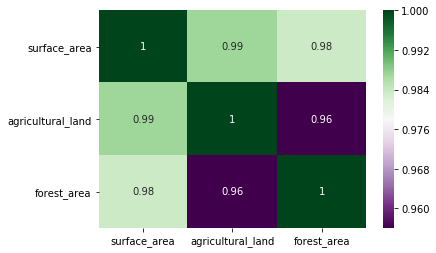

In [276]:
# Check if these three variables are highly correlated (multicollinearity problem)
sns.heatmap(df[['surface_area', 'agricultural_land','forest_area']].corr(),
            cmap='PRGn',annot=True);

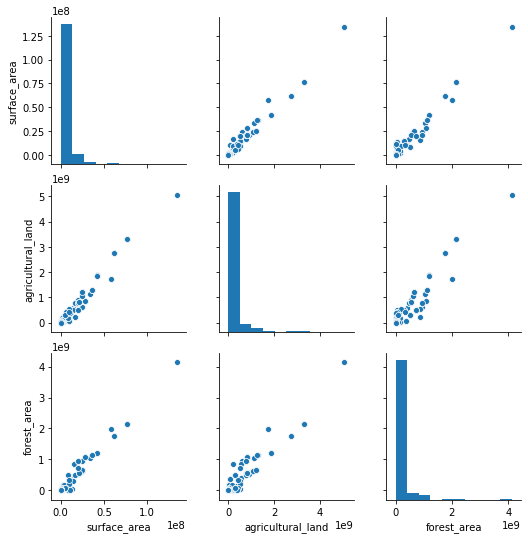

In [277]:
# Plot pairwise relationship and distribution of these three variables
sns.pairplot(df[['surface_area', 'agricultural_land','forest_area']]);

***There are strong linear relashionships among 'surface_area', 'agricultural_land', and 'forest_area'.***
Therefore, having these three variables altogether will not help (provide additional information) future prediction. To resolve this 
problem the following steps are taken:  <br>
1) Multiply 'surface_area' by 100 (to fix data entry/unit issue).  <br>
2) Create two new features (colums) namely 'agricultural_portion' and 'forest_portion' by dividing
   'agricultural_land' and 'forest_area' by 'surface_area' respectively.  <br>
3) Remove 'agricultural_land' and 'forest_area' colums from dataset.

In [278]:
# make a copy of the orginal dataframe
df1 = df.copy()

# Step 1: Multiply 'surface_area' by 100
df1['surface_area'] = df1['surface_area'] * 100

# Step 2: Creates new variables 
df1['agricultural_portion'] = df1['agricultural_land'] / df1['surface_area'] 
df1['forest_portion'] = df1['forest_area'] / df1['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
df1.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Show the first 10 row of df1
df1.head(10)

surface_area  armed_forces_total  urban_pop_major_cities  \
0   1.205400e+07           1379000.0               55.747169   
1   7.526100e+07             16500.0               16.890687   
2   1.396000e+05                 NaN               18.390090   
3   2.758812e+08           1518650.0               50.966885   
4   3.400000e+04                 NaN                5.311885   
5   7.835600e+07            612800.0               37.699524   
6   2.846040e+09           5032780.0               32.853558   
7   5.490910e+07            325600.0               24.582761   
8   3.571700e+07            186450.0               18.091168   
10  7.160000e+04            147600.0               51.288344   

    urban_pop_minor_cities national_income  inflation_annual  \
0                 4.688831         unknown               NaN   
1                23.136313        very low               NaN   
2                23.139910         unknown               NaN   
3                24.522427            high          1.374906   
4                30.271115         unknown         -0.044229   
5                34.134476      medium low               NaN   
6                37.469387     medium high          2.773339   
7                54.237239            high          1.955685   
8                56.596832            high          2.008491   
10               48.711656         unknown               NaN   

    inflation_monthly  inflation_weekly    mobile_subscriptions  \
0                 NaN               NaN  less than 1 per person   
1            0.581473               NaN  less than 1 per person   
2                 NaN               NaN  more than 1 per person   
3                 NaN               NaN  more than 1 per person   
4                 NaN               NaN  more than 1 per person   
5            0.740964               NaN  less than 1 per person   
6                 NaN               NaN  more than 1 per person   
7                 NaN               NaN  less than 1 per person   
8                 NaN               NaN  more than 1 per person   
10           0.377388               NaN  more than 1 per person   

         internet_users  secure_internet_servers_total improved_sanitation  \
0     0 per 1000 people                            NaN         high access   
1   154 per 1000 people                   2.623624e+06          low access   
2     90 per 100 people                   1.656589e+09             no info   
3     76 per 100 people                   6.625072e+08    very high access   
4   350 per 1000 people                   2.832808e+07    very high access   
5     45 per 100 people                   1.166004e+08    very high access   
6     64 per 100 people                   4.702241e+08    very high access   
7     81 per 100 people                   4.093085e+08    very high access   
8     82 per 100 people                   1.110775e+09    very high access   
10    72 per 100 people                   6.353061e+08    very high access   

   women_parliament_seats_rate  life_expectancy  agricultural_portion  \
0                     [0%-25%)        69.494195              0.218420   
1                     [0%-25%)        59.237366              0.319294   
2                      unknown        81.300000              0.021490   
3                    [25%-50%)        81.373197              0.445426   
4                    [25%-50%)        73.193561              0.323529   
5                     [0%-25%)        74.862439              0.499032   
6                     [0%-25%)        76.569368              0.294847   
7                    [25%-50%)        81.968293              0.526820   
8                    [25%-50%)        80.892683              0.478109   
10                    [0%-25%)        81.995122              0.010340   

    forest_portion  
0         0.449464  
1         0.658715  
2         0.000573  
3         0.380940  
4         0.499706  
5         0.148224  
6         0.379839  
7         0.304076  
8   

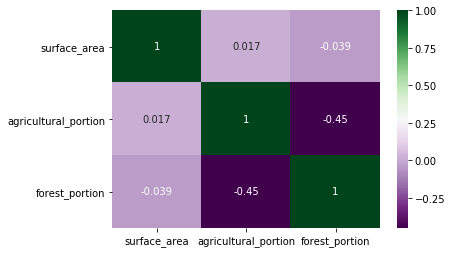

In [279]:
# Check correlations among 'surface_area', 'agriculture_portion' & 'forest_portion' for multicollinearity
sns.heatmap(df1[['surface_area', 'agricultural_portion','forest_portion']].corr(),
            cmap='PRGn',annot=True);

**The variable description indicates 'inflation_annual', 'inflation_monthly', and 'inflarion_weekly' are linearly dependent.**  <br> Therefore, we will keep only 'inflation_annual' column and replace NaN values using information from the other two features (if possible).

In [280]:
# Check missing values
df1.isnull().sum()

surface_area                       0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
agricultural_portion               4
forest_portion                     5
dtype: int64

In [281]:
# To find for how many instances all the three values are missing
#len(df1[(df1['inflation_annual'].isnull()) & (df1['inflation_monthly'].isnull()) & (df1['inflation_weekly'].isnull())])

# Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

for i in df1.index:
    if np.isnan(df1.loc[i, 'inflation_annual']):
        if np.isnan(df1.loc[i, 'inflation_monthly']):
            df1.loc[i, 'inflation_annual'] = 52 * df1.loc[i, 'inflation_weekly']
        else:
            df1.loc[i, 'inflation_annual'] = 12 * df1.loc[i, 'inflation_monthly']

# Remove columns 'inflation_monthly' & 'inflation_weekly'
df1.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

In [282]:
df1.isnull().sum()

surface_area                      0
armed_forces_total               44
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
inflation_annual                 40
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total    10
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
agricultural_portion              4
forest_portion                    5
dtype: int64

In [283]:
# Convert categorical and ordinal fearures into numeric features
# Decide which categorical variables you want to use in model
for col_name in df1.columns:
    if df1[col_name].dtypes == 'object':
        unique_cat = len(df1[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'national_income' has 7 unique categories
Feature 'mobile_subscriptions' has 5 unique categories
Feature 'internet_users' has 198 unique categories
Feature 'improved_sanitation' has 6 unique categories
Feature 'women_parliament_seats_rate' has 4 unique categories


**There are too many categories in 'internet_users'. It's more simillar to a numeric feature! Let's check...**

In [284]:
# Explore values in 'internet_users' column
df1['internet_users']

0        0 per 1000 people
1      154 per 1000 people
2        90 per 100 people
3        76 per 100 people
4      350 per 1000 people
5        45 per 100 people
6        64 per 100 people
7        81 per 100 people
8        82 per 100 people
10       72 per 100 people
11       79 per 100 people
12     337 per 1000 people
13      44 per 1000 people
14     380 per 1000 people
15      49 per 1000 people
17      66 per 1000 people
18       73 per 100 people
20       44 per 100 people
21      92 per 1000 people
22       72 per 100 people
24       61 per 100 people
25       94 per 100 people
26       47 per 100 people
27     369 per 1000 people
30     115 per 1000 people
32     390 per 1000 people
33     279 per 1000 people
34       67 per 100 people
35      17 per 1000 people
36     129 per 1000 people
              ...         
424      94 per 100 people
425      68 per 100 people
426    283 per 1000 people
427      66 per 100 people
428      65 per 100 people
429    347 per 1000 people
4

In [285]:
# Convert 'internet_users' column to associated percentages
variable_split = df1['internet_users'].str.split()
df1['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))
# Remove 'internet_users' column
df1.drop('internet_users', axis=1, inplace=True)

In [286]:
df1.head()

surface_area  armed_forces_total  urban_pop_major_cities  \
0    12054000.0           1379000.0               55.747169   
1    75261000.0             16500.0               16.890687   
2      139600.0                 NaN               18.390090   
3   275881200.0           1518650.0               50.966885   
4       34000.0                 NaN                5.311885   

   urban_pop_minor_cities national_income  inflation_annual  \
0                4.688831         unknown               NaN   
1               23.136313        very low          6.977676   
2               23.139910         unknown               NaN   
3               24.522427            high          1.374906   
4               30.271115         unknown         -0.044229   

     mobile_subscriptions  secure_internet_servers_total improved_sanitation  \
0  less than 1 per person                            NaN         high access   
1  less than 1 per person                   2.623624e+06          low access   
2  more than 1 per person                   1.656589e+09             no info   
3  more than 1 per person                   6.625072e+08    very high access   
4  more than 1 per person                   2.832808e+07    very high access   

  women_parliament_seats_rate  life_expectancy  agricultural_portion  \
0                    [0%-25%)        69.494195              0.218420   
1                    [0%-25%)        59.237366              0.319294   
2                     unknown        81.300000              0.021490   
3                   [25%-50%)        81.373197              0.445426   
4                   [25%-50%)        73.193561              0.323529   

   forest_portion  percent_internet_users  
0        0.449464                   0.000  
1        0.658715                   0.154  
2        0.000573                   0.900  
3        0.380940                   0.760  
4        0.499706                   0.350

In [287]:
# Check the frequency of categories (labels) in each categorical variable 
for name in df1.select_dtypes(include=['object']):
    print(name,':')
    print(df1[name].value_counts(),'\n')

national_income :
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: national_income, dtype: int64 

mobile_subscriptions :
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: mobile_subscriptions, dtype: int64 

improved_sanitation :
very high access    155
low access           55
medium access        54
high access          47
very low access      33
no info              18
Name: improved_sanitation, dtype: int64 

women_parliament_seats_rate :
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: women_parliament_seats_rate, dtype: int64 



In [288]:
# Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
df1['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in df1['mobile_subscriptions']]

In [299]:
# Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[0%-25%)', 1))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[25%-50%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[50%-75%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('unknown', 3))

In [303]:
# Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
df1['national_income'].replace(mapper_1, inplace=True)

In [305]:
# Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
df1['improved_sanitation'].replace(mapper_2, inplace=True)

#### Handling Missing Data

In [315]:
# make a copy of df1  
df2 = df1.copy()
# How much of your data is missing?
df2.isnull().sum().sort_values(ascending=False)

armed_forces_total               44
inflation_annual                 40
secure_internet_servers_total    10
percent_internet_users            6
forest_portion                    5
agricultural_portion              4
urban_pop_minor_cities            2
urban_pop_major_cities            2
life_expectancy                   0
women_parliament_seats_rate       0
improved_sanitation               0
mobile_subscriptions              0
national_income                   0
surface_area                      0
dtype: int64

In [317]:
# Impute missing values using Imputer in sklearn.preprocessing

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(df2)
df2 = pd.DataFrame(data=imp.transform(df2) , columns=df2.columns)

In [322]:
df2.head(10)

surface_area  armed_forces_total  urban_pop_major_cities  \
0  1.205400e+07           1379000.0               55.747169   
1  7.526100e+07             16500.0               16.890687   
2  1.396000e+05             53525.0               18.390090   
3  2.758812e+08           1518650.0               50.966885   
4  3.400000e+04             53525.0                5.311885   
5  7.835600e+07            612800.0               37.699524   
6  2.846040e+09           5032780.0               32.853558   
7  5.490910e+07            325600.0               24.582761   
8  3.571700e+07            186450.0               18.091168   
9  7.160000e+04            147600.0               51.288344   

   urban_pop_minor_cities  national_income  inflation_annual  \
0                4.688831              7.0          3.371067   
1               23.136313              1.0          6.977676   
2               23.139910              7.0          3.371067   
3               24.522427              5.0          1.374906   
4               30.271115              7.0         -0.044229   
5               34.134476              2.0          8.891570   
6               37.469387              4.0          2.773339   
7               54.237239              5.0          1.955685   
8               56.596832              5.0          2.008491   
9               48.711656              7.0          4.528651   

   mobile_subscriptions  secure_internet_servers_total  improved_sanitation  \
0                   1.0                   2.671228e+07                  4.0   
1                   1.0                   2.623624e+06                  2.0   
2                   2.0                   1.656589e+09                  6.0   
3                   2.0                   6.625072e+08                  5.0   
4                   2.0                   2.832808e+07                  5.0   
5                   1.0                   1.166004e+08                  5.0   
6                   2.0                   4.702241e+08                  5.0   
7                   1.0                   4.093085e+08                  5.0   
8                   2.0                   1.110775e+09                  5.0   
9                   2.0                   6.353061e+08                  5.0   

   women_parliament_seats_rate  life_expectancy  agricultural_portion  \
0                          1.0        69.494195              0.218420   
1                          1.0        59.237366              0.319294   
2                          3.0        81.300000              0.021490   
3                          2.0        81.373197              0.445426   
4                          2.0        73.193561              0.323529   
5                          1.0        74.862439              0.499032   
6                          1.0        76.569368              0.294847   
7                          2.0        81.968293              0.526820   
8                          2.0        80.892683              0.478109   
9                          1.0        81.995122              0.010340   

   forest_portion  percent_internet_users  
0        0.449464                   0.000  
1        0.658715                   0.154  
2        0.000573                   0.900  
3        0.380940                   0.760  
4        0.499706                   0.350  
5        0.148224                   0.450  
6        0.379839                   0.640  
7        0.304076                   0.810  
8        0.327452                   0.820  
9        0.231586                   0.720

## Visualization, Modeling, Machine Learning

 Can you construct a reliable model that predicts the life expectancy of an area (country, region, group of countries) using socioeconomic variables and identify how different features influence their decision? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of Mean Absolute Error.**
- **Read the Test.csv file and prepare features for testing.**

In [399]:
def plot_histogram(x):
    plt.hist(x, color='gray', edgecolor='black', alpha=0.8)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

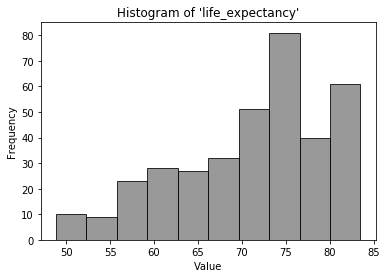

In [400]:
# Plot distribution of traget (outcome) variable in the training data
plot_histogram(df2['life_expectancy'])

In [422]:
#Loading Test data
test_data=pd.read_csv('test.csv',index_col=0)
test_data.head()

surface_area  agricultural_land   forest_area  armed_forces_total  \
9       322460.0       2.088892e+07  1.054769e+07                 NaN   
16      513120.0       2.220651e+07  1.641032e+07            453550.0   
19       18580.0       1.872230e+05  8.527691e+05                 NaN   
23      112490.0       3.252347e+06  4.857911e+06             20000.0   
28      783560.0       3.911844e+07  1.171853e+07            612800.0   

    urban_pop_major_cities  urban_pop_minor_cities national_income  \
9                 0.846584               51.919416             low   
16               42.139810                5.803190             low   
19                1.699056               67.396944         unknown   
23               48.602426                4.934574             low   
28               43.734006               28.635994      medium low   

    inflation_annual  inflation_monthly  inflation_weekly  \
9           2.569961                NaN               NaN   
16          2.184886                NaN               NaN   
19               NaN                NaN               NaN   
23               NaN           0.430158               NaN   
28               NaN           0.624424               NaN   

      mobile_subscriptions       internet_users  \
9   less than 1 per person   84 per 1000 people   
16  more than 1 per person  289 per 1000 people   
19  less than 1 per person    66 per 100 people   
23  less than 1 per person  178 per 1000 people   
28  less than 1 per person    46 per 100 people   

    secure_internet_servers_total improved_sanitation  \
9                       1849926.0     very low access   
16                     17983312.0    very high access   
19                    240458015.0    very high access   
23                      9427882.0         high access   
28                     50379814.0    very high access   

   women_parliament_seats_rate  
9                     [0%-25%)  
16                    [0%-25%)  
19                     unknown  
23                    [0%-25%)  
28                    [0%-25%)

In [424]:
# Create a copy of test dataframe
tdf = test_data.copy()

# Step 1: Multiply 'surface_area' by 100
tdf['surface_area'] = tdf['surface_area'] * 100

# Step 2: Creates new variables 
tdf['agricultural_portion'] = tdf['agricultural_land'] / tdf['surface_area'] 
tdf['forest_portion'] = tdf['forest_area'] / tdf['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
tdf.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Step 4: Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

for i in tdf.index:
    if np.isnan(tdf.loc[i, 'inflation_annual']):
        if np.isnan(tdf.loc[i, 'inflation_monthly']):
            tdf.loc[i, 'inflation_annual'] = 52 * tdf.loc[i, 'inflation_weekly']
        else:
            tdf.loc[i, 'inflation_annual'] = 12 * tdf.loc[i, 'inflation_monthly']

# Step5: Remove columns 'inflation_monthly' & 'inflation_weekly'
tdf.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

# Step6: Convert 'internet_users' column to associated percentages
variable_split = tdf['internet_users'].str.split()
tdf['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))

# Step 7: Remove 'internet_users' column
tdf.drop('internet_users', axis=1, inplace=True)

# Step 8: Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
tdf['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in tdf['mobile_subscriptions']]

# Step 9: Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[0%-25%)', 1))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[25%-50%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[50%-75%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('unknown', 3))

# Step 10: Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
tdf['national_income'].replace(mapper_1, inplace=True)

# Step 11: Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
tdf['improved_sanitation'].replace(mapper_2, inplace=True)

# Step12: Impute missing values using Imputer in sklearn.preprocessing
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(tdf)
tdf = pd.DataFrame(data=imp.transform(tdf) , columns=tdf.columns)

# Show the first 5 rows of tdf
tdf.head()

surface_area  armed_forces_total  urban_pop_major_cities  \
0  3.224600e+09             50800.0                0.846584   
1  5.131200e+09            453550.0               42.139810   
2  1.858000e+08             50800.0                1.699056   
3  1.124900e+09             20000.0               48.602426   
4  7.835600e+09            612800.0               43.734006   

   urban_pop_minor_cities  national_income  inflation_annual  \
0               51.919416              3.0          2.569961   
1                5.803190              3.0          2.184886   
2               67.396944              7.0          3.009844   
3                4.934574              3.0          5.161899   
4               28.635994              2.0          7.493090   

   mobile_subscriptions  secure_internet_servers_total  improved_sanitation  \
0                   1.0                      1849926.0                  1.0   
1                   2.0                     17983312.0                  5.0   
2                   1.0                    240458015.0                  5.0   
3                   1.0                      9427882.0                  4.0   
4                   1.0                     50379814.0                  5.0   

   women_parliament_seats_rate  agricultural_portion  forest_portion  \
0                          1.0              0.006478        0.003271   
1                          1.0              0.004328        0.003198   
2                          3.0              0.001008        0.004590   
3                          1.0              0.002891        0.004319   
4                          1.0              0.004992        0.001496   

   percent_internet_users  
0                   0.084  
1                   0.289  
2                   0.660  
3                   0.178  
4                   0.460

### Random Forest Regression

In [364]:
# Create outcome and input DataFrames
y = df2['life_expectancy'] 
X = df2.drop('life_expectancy', axis=1)
y.head()

0    69.494195
1    59.237366
2    81.300000
3    81.373197
4    73.193561
Name: life_expectancy, dtype: float64

In [330]:
# Create train and validation datasets to build the Random Forest (RF) regression 
# model and find the best set of the model parameters 

#X_train, X_validation, y_train, y_validation= train_test_split(X, y,
#                                                   random_state = 0)

In [370]:
# Use 'Grid Search' to find the best set of RF regression parameters 
# using full dataset with criterion = 'mean absolute error' (mae) and 
# random_state = 33

n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'mae', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit (X, y)    
            y_model = rf.predict(X)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X, y, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

Number of Estimators: 200
Max features: 8
Max Depth: 7
Min Split: 4
Min Leaf: 3
Best Mean Absolute Error: 2.651


In [377]:
# Fit a RF using best indentified parameters
rf = RandomForestRegressor(n_estimators=200, criterion = 'mae', max_features=8, random_state = 33,
                           max_depth=7, min_samples_split=4, min_samples_leaf=3)

rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=7,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=33, verbose=0,
                      warm_start=False)

In [405]:
# Pridict test instances using test dataframe (tdf)
y_test = rf.predict(tdf)
y_test

array([61.21576236, 72.17913654, 77.64396423, 69.37472877, 74.16639462,
       67.56742806, 74.44622222, 67.62157135, 72.21403977, 72.539764  ,
       76.28794076, 79.70337493, 60.11828987, 59.41112964, 81.43322228,
       75.19505403, 74.73886557, 75.22790048, 76.59990496, 63.39665437,
       62.75899793, 73.3741819 , 74.21039887, 77.4242129 , 73.99366623,
       70.27708375, 58.00926507, 81.31250431, 81.04001027, 79.09544647,
       74.64231839, 61.93740672, 59.78046512, 61.10390984, 81.15515007,
       80.03130275, 76.83474326, 80.08562194, 76.02108748, 80.60220875,
       74.19558702, 67.08085132, 64.07564855, 62.14013361, 58.11581145,
       77.04303859, 67.94432222, 64.84355717, 57.92012916, 76.76636034,
       74.79760513, 74.50256829, 64.70950351, 80.94172584, 57.81896824,
       78.06583851, 80.7934535 , 60.64691307, 73.52024974, 66.02877715,
       70.64239277, 74.10233406, 55.47507375, 71.5581179 , 71.7264811 ,
       59.92385354, 62.0234687 , 59.26942424, 75.33780867, 64.97

In [403]:
# Plot histograms to compare distribution of actual outcomes vs. prediction 
def plot_histogram_comp(x,y):
    plt.hist(x, alpha=0.5, edgecolor='black', label='Actual')
    plt.hist(y, alpha=0.5, edgecolor='black', label='Prediction')
    plt.title("Histogram of actual outcomes v.s predicted outcomes")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    plt.show()

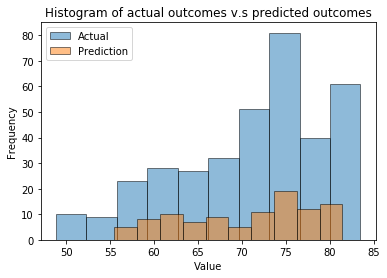

In [404]:
# Check to see if distribution of actual target values is close to the distribution
# of predicted target values
plot_histogram_comp(y,y_test)



**The government wants to know what are the most important features for your model.  Can you tell them?**

> #### Task:
- **Visualize the top 13 features and their feature importance.**


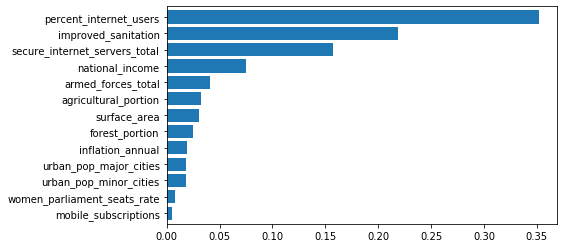

In [442]:
# Extract feature importance determined by RF model
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4));

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`Test.csv`), you must predict the value of the `life_expectancy` variable. You should submit a CSV file with a header row and one row per test entry. The file (submissions.csv) should have exactly 2 columns:

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **life_expectancy**

In [441]:
# Create a submission_df
d = {'id': test_data.index, 'life_expectancy': y_test}
submission_df = pd.DataFrame(data=d)
submission_df

id  life_expectancy
0     9        61.215762
1    16        72.179137
2    19        77.643964
3    23        69.374729
4    28        74.166395
5    29        67.567428
6    31        74.446222
7    37        67.621571
8    39        72.214040
9    42        72.539764
10   51        76.287941
11   58        79.703375
12   64        60.118290
13   66        59.411130
14   67        81.433222
15   71        75.195054
16   80        74.738866
17   81        75.227900
18   83        76.599905
19   97        63.396654
20  100        62.758998
21  105        73.374182
22  106        74.210399
23  111        77.424213
24  112        73.993666
25  115        70.277084
26  121        58.009265
27  138        81.312504
28  143        81.040010
29  144        79.095446
..  ...              ...
70  321        61.811899
71  323        72.024878
72  324        60.858272
73  326        74.147163
74  329        59.458600
75  338        61.099565
76  339        79.946910
77  341        71.237135
78  346        73.962667
79  351        76.626893
80  354        77.046420
81  365        73.795626
82  373        75.269684
83  383        67.195873
84  385        71.286673
85  387        69.289826
86  396        64.726664
87  399        77.017873
88  406        80.576087
89  408        74.031058
90  412        81.249052
91  415        67.871133
92  430        71.371794
93  431        64.927558
94  432        62.027130
95  433        55.668189
96  441        76.754514
97  443        69.514482
98  453        67.134368
99  455        66.005409

[100 rows x 2 columns]

In [437]:
#Submission
submission_df.to_csv('submissions.csv',index=False)